> 谢邀，Seaborn的底层是基于Matplotlib的，他们的差异有点像在点餐时选套餐还是自己点的区别，Matplotlib是独立点菜，可能费时费心（尤其是对我这种选择困难症患者...）但最后上桌的菜全是特别适合自己的；而Seaborn是点套餐，特别简单，一切都是配好的，虽然省时省心，但可能套餐里总有些菜是不那么合自己口味的。展开说一下：Seaborn是用户把自己常用到的可视化绘图过程进行了函数封装，形成的一个“快捷方式”，他相比Matplotlib的好处是代码更简洁，可以用一行代码实现一个清晰好看的可视化输出。主要的缺点则是定制化能力会比较差，只能实现固化的一些可视化模板类型；而Matplotlib是可以实现高度定制化绘图的，高度定制化可以让你获得最符合心意的可视化输出结果，但也因此需要设置更多的参数，因而代码更加复杂一些。

作者：Jack Sun
链接：https://www.zhihu.com/question/301637122/answer/528183410
来源：知乎

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

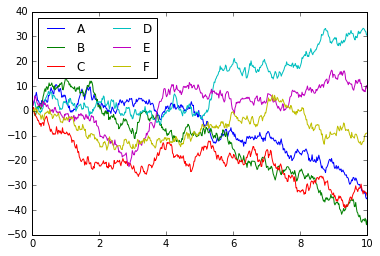

In [2]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')

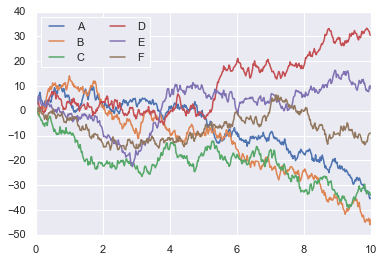

In [3]:
# 使用seaborn
import seaborn as sns
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')

## 1 | 频次直方图, KDE和密度图

`kdeplot`, `distplot`和`jointplot`

[[-0.25036626 -0.91198157]
 [-1.31149096 -0.24176518]
 [ 1.80456833 -0.24056103]
 [ 1.05076073  0.66536   ]
 [ 2.52380182  2.08689532]]
          x         y
0 -0.250366 -0.911982
1 -1.311491 -0.241765
2  1.804568 -0.240561
3  1.050761  0.665360
4  2.523802  2.086895


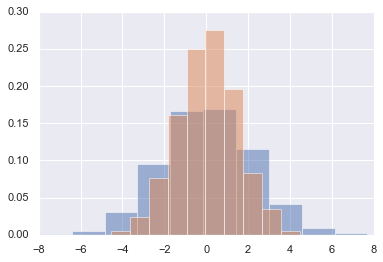

In [11]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size = 2000)
print(data[:5])
data = pd.DataFrame(data, columns = ['x', 'y'])
print(data[:5])
# matplotlib画频次直方图
for col in 'xy':
    plt.hist(data[col], density = True, alpha = 0.5)

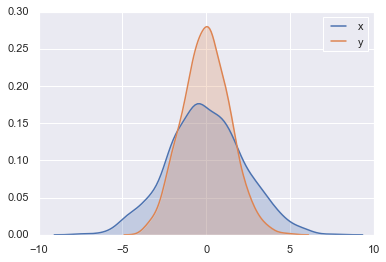

In [8]:
# seaborn的kdeplot实现KDE变量分布平滑估计
for col in 'xy':
    sns.kdeplot(data[col], shade = True)

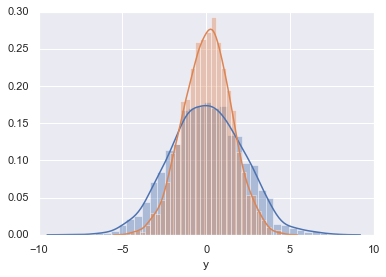

In [13]:
# 让频次直方图和KDE结合起来
for col in 'xy':
    sns.distplot(data[col])

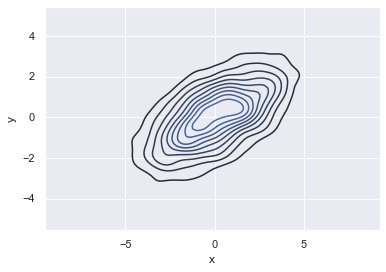

In [15]:
# 若输入二维数据集, 可以得到二维数据可视化图
sns.kdeplot(data['x'], data['y'])

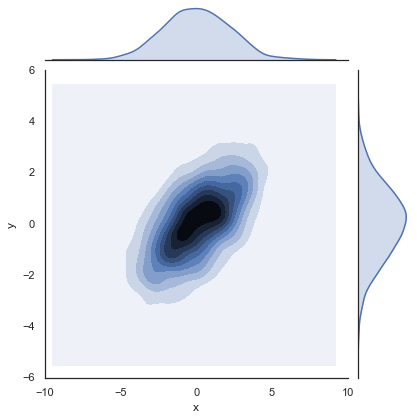

In [16]:
# 使用sns.jointplot可以同时看到两个变量的联合分布和单变量的独立分布
with sns.axes_style('white'):  # 白色背景
    sns.jointplot("x", "y", data, kind = 'kde')

## 2 | 矩阵图`pairplot`

In [17]:
iris = sns.load_dataset('iris')  # 加载鸢尾花数据集
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


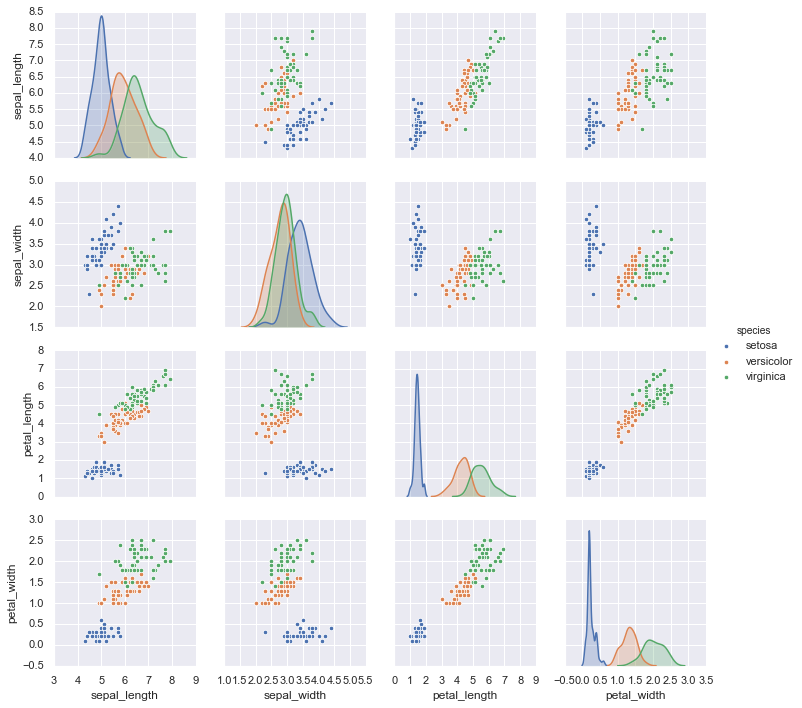

In [19]:
# 画矩阵图pairplot
sns.pairplot(iris, hue = 'species', height = 2.5)

## 3 | 分面频次直方图`FacetGrid`

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


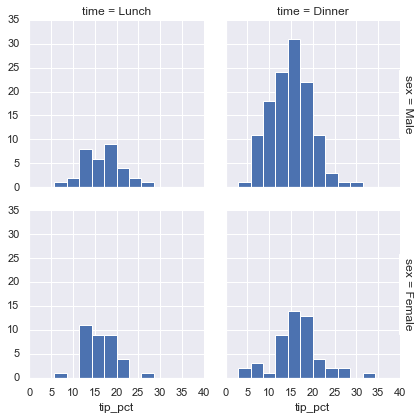

In [30]:
tips = sns.load_dataset('tips')
print(tips.head())

tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row = 'sex', col = 'time', margin_titles = True)
grid.map(plt.hist, "tip_pct", bins = np.linspace(0, 40, 15));

## 4 | 因子图`catplot(kind = 'box')`

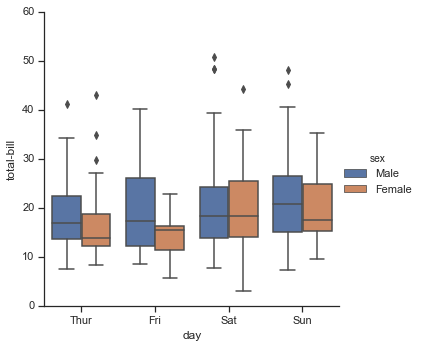

In [27]:
with sns.axes_style(style = 'ticks'):
    g = sns.catplot("day", "total_bill", "sex", data = tips, kind = 'box')
    g.set_axis_labels('day', 'total-bill')

## 5 | 条形图`catplot(kind = 'count')`

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009


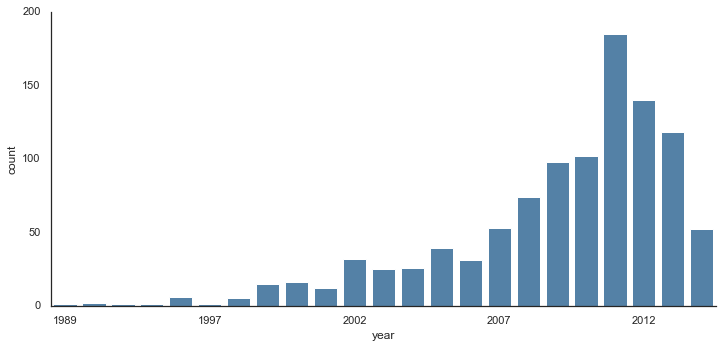

In [38]:
planets = sns.load_dataset('planets')
print(planets.head())
with sns.axes_style('white'):
    g = sns.catplot('year', data = planets, aspect = 2, kind = "count", color = 'steelblue') # aspect:宽高比
    g.set_xticklabels(step = 5)